<a href="https://colab.research.google.com/github/mazzidougs/Bitcoin-analysis-with-Meta-Prophet/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Historical Data



### Contextualization

Bitcoin is a decentralized digital currency, first introduced in 2009, that operates on a peer-to-peer network. It has gained significant popularity and relevance in recent years due to its potential for secure, borderless transactions and its finite supply, leading to it being seen as a store of value similar to gold. Despite some initial skepticism and ongoing regulatory concerns, it has been widely adopted by individuals and companies as a form of investment and payment method.

Why forecasting is important in bitcoin?

Forecasting the price of Bitcoin is important for several reasons:

*Investment* Decisions: Accurate forecasting helps individuals and businesses make informed investment decisions, such as buying, holding, or selling the currency.

*Market Analysis*: Forecasting helps market participants understand market trends and make better decisions about buying and selling, which can impact the price and stability of the currency.

*Risk Management*: By understanding the potential future direction of the Bitcoin market, traders and investors can better manage their risk.

*Regulatory Planning*: Accurate forecasts help regulators understand the future potential impact of their actions on the market and the broader economy.

However, it's important to note that Bitcoin price predictions are often unreliable and subject to significant volatility. Therefore, forecasting should be approached with caution and used as one factor among many in investment decisions.

#### Importing dataset with Kaggle API



In [4]:
import json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
#to import the data, we must import Kaggle.json to use the Kaggle API.
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mczielinski/bitcoin-historical-data
!unzip bitcoin-historical-data.zip

!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 85% 85.0M/100M [00:00<00:00, 142MB/s]
100% 100M/100M [00:00<00:00, 142MB/s] 
Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from matplotlib import pyplot

In [7]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [8]:
df.Timestamp.value_counts().sum()

4857377

In [9]:
df.head(None)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [10]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [11]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

Text(0.5, 0, 'Time')

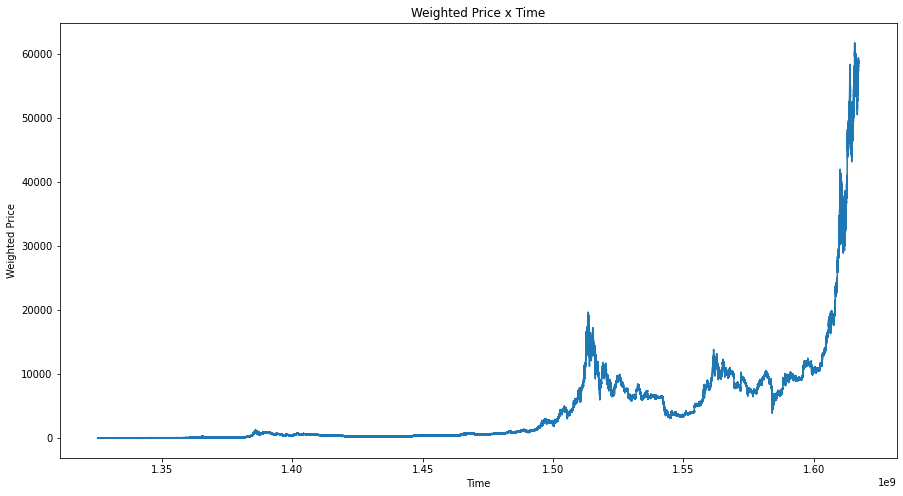

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
x = df.Timestamp
y = df.Weighted_Price

ax.plot(x, y)
ax.set_title("Weighted Price x Time")
ax.set_ylabel("Weighted Price")
ax.set_xlabel("Time")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

####Transformação de date para datatime para a utilização do Prophet e transformação para um dataframe com ds e y

In [14]:
df_prophet = df.copy()

#rename columns
df_prophet = df.rename(columns={'Weighted_Price':'y'})

#check
df_prophet.columns

ds = pd.to_datetime(df_prophet['Timestamp'],unit='s')

df_prophet.insert(0, 'ds', ds)

#removing every column instead ds and y for prophet implementation
df_prophet.drop(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)'], axis=1, inplace=True)

df_prophet.head()

,ds,y
0,2011-12-31 07:52:00,4.39
1,2011-12-31 07:53:00,NaN
2,2011-12-31 07:54:00,NaN
3,2011-12-31 07:55:00,NaN
4,2011-12-31 07:56:00,NaN


Como os valores NaN indicam que não possuímos variações nos valores, iremos remove-los.

In [15]:
df_prophet = df_prophet.dropna()
df_prophet.isnull().sum()

ds    0
y     0
dtype: int64

In [16]:
df_prophet.value_counts().sum()

3613769

In [17]:
df_filtered = df_prophet.loc[pd.to_datetime(df_prophet.ds).dt.minute.eq(0)]
df_filtered.value_counts().sum()

63024

In [18]:
df_filtered.head(None)

,ds,y
548,2011-12-31 17:00:00,4.580000
6248,2012-01-04 16:00:00,5.360462
9248,2012-01-06 18:00:00,6.400000
13448,2012-01-09 16:00:00,6.600000
14528,2012-01-10 10:00:00,6.240000
...,...,...
4857136,2021-03-30 20:00:00,59090.651748
4857196,2021-03-30 21:00:00,58620.228970
4857256,2021-03-30 22:00:00,58762.179612
4857316,2021-03-30 23:00:00,58648.607194


Text(0.5, 0, 'ds')

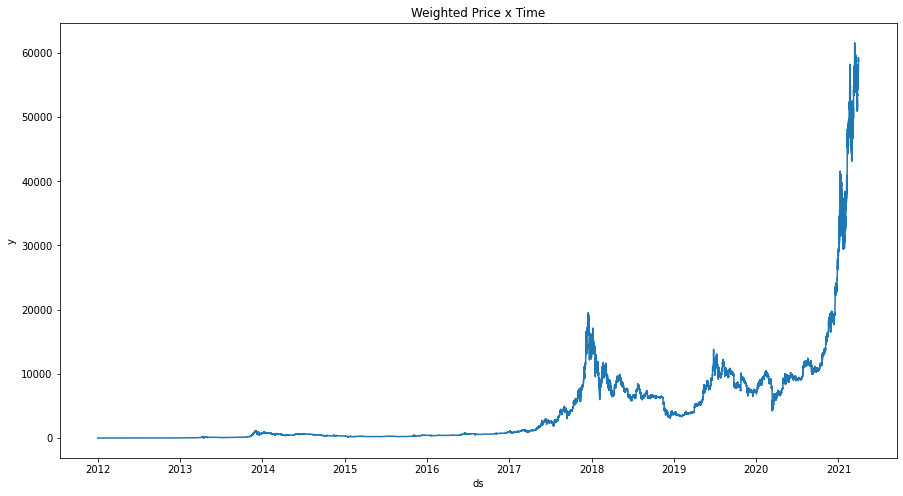

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
x = df_filtered.ds
y = df_filtered.y

ax.plot(x, y)
ax.set_title("Weighted Price x Time")
ax.set_ylabel("y")
ax.set_xlabel("ds")

In [20]:
df_diff = df_prophet.y.diff().diff()

In [21]:
m = Prophet()
m.fit(df_filtered)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_dpl7uc/37buhxsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_dpl7uc/ao479b5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97586', 'data', 'file=/tmp/tmpx_dpl7uc/37buhxsg.json', 'init=/tmp/tmpx_dpl7uc/ao479b5p.json', 'output', 'file=/tmp/tmpx_dpl7uc/prophet_modelv2c0zznm/prophet_model-20230215140714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
df_diff[0]

df_prophet = df.rename(columns={'Weighted_Price':'y'})


In [23]:
df_diff.dtypes

dtype('float64')

In [24]:
future = m.make_future_dataframe(periods=800)
future.tail()

,ds
63819,2023-06-05
63820,2023-06-06
63821,2023-06-07
63822,2023-06-08
63823,2023-06-09


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
63819,2023-06-05,79785.461177,-114859.709521,294722.603131
63820,2023-06-06,79780.049045,-114304.659299,295267.149134
63821,2023-06-07,79748.540130,-116566.622446,297744.262704
63822,2023-06-08,79747.798683,-113678.149675,294489.270694
63823,2023-06-09,79711.258888,-113393.875621,296091.582621


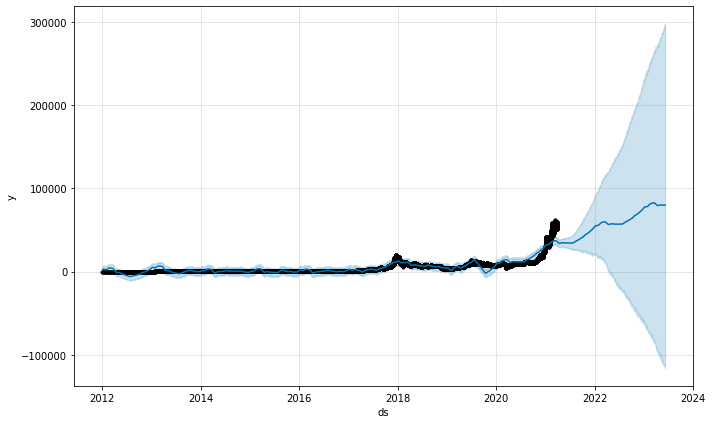

In [26]:
fig1 = m.plot(forecast)

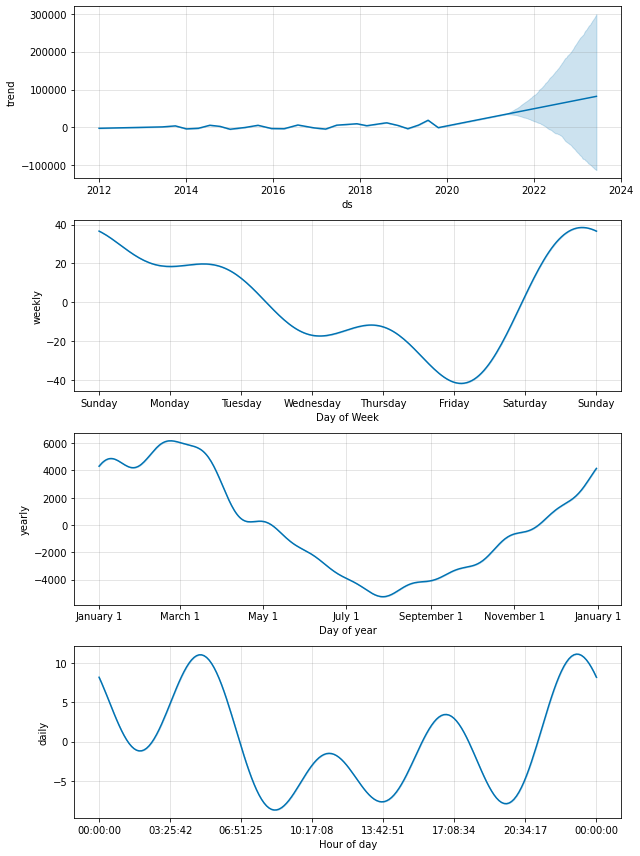

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
df_plot = df.copy()

#rename columns
df_plot = df.rename(columns={'Weighted_Price':'y'})

#check
df_plot.columns

ds = pd.to_datetime(df_plot['Timestamp'],unit='s')

df_plot.insert(0, 'ds', ds)

#removing every column instead ds and y for prophet implementation
df_plot.drop(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)'], axis=1, inplace=True)

df_plot.head()

,ds,y
0,2011-12-31 07:52:00,4.39
1,2011-12-31 07:53:00,NaN
2,2011-12-31 07:54:00,NaN
3,2011-12-31 07:55:00,NaN
4,2011-12-31 07:56:00,NaN


####Ascensão e declínio da primeira e segunda derivada

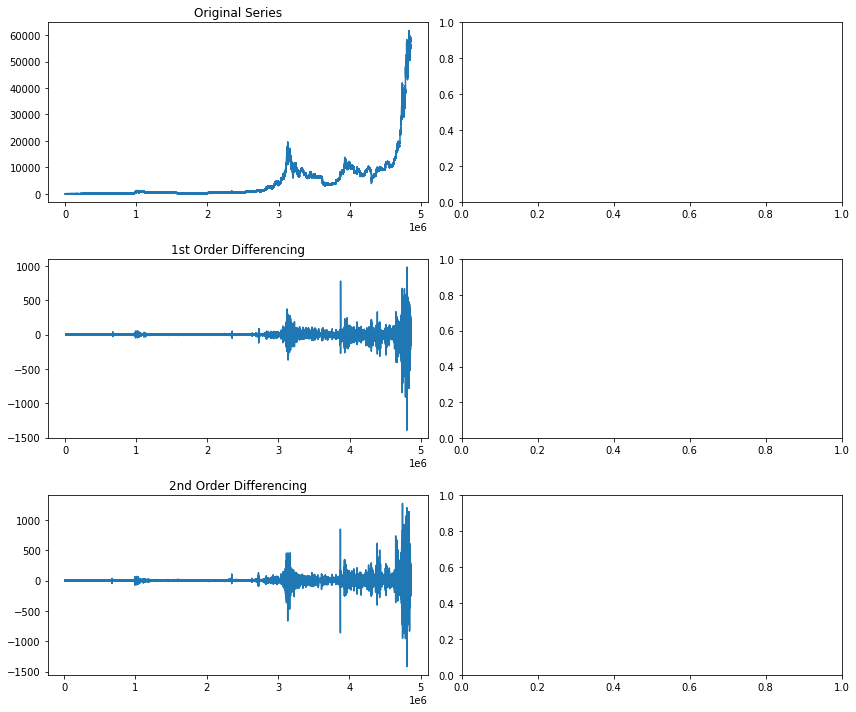

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# read the data from the file, parse the dates and set as index
#df = pd.read_csv('file.csv', index_col=[0], parse_dates=[0])

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0, 0].plot(df_prophet.y)
axes[0, 0].set_title('Original Series')
#plot_acf(df_prophet.y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_prophet.y.diff())
axes[1, 0].set_title('1st Order Differencing')
#plot_acf(df_prophet.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_prophet.y.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(df_prophet.y.diff().diff().dropna(), ax=axes[2, 1])

fig.tight_layout()
plt.show()

In [32]:
# cross validation, 13 validations were made so this snippet takes a while with the free version of colab
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2020-03-31 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_dpl7uc/r2sylg9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_dpl7uc/aquq5j0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72630', 'data', 'file=/tmp/tmpx_dpl7uc/r2sylg9w.json', 'init=/tmp/tmpx_dpl7uc/aquq5j0n.json', 'output', 'file=/tmp/tmpx_dpl7uc/prophet_modelp_wkuach/prophet_model-20230215141730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_dpl7uc/rnzbrrxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_dpl7uc/d9ulpw_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02 01:00:00,425.968634,371.834213,479.439300,461.900000,2014-05-02
1,2014-05-02 02:00:00,425.329663,369.210212,479.382797,459.659698,2014-05-02
2,2014-05-02 03:00:00,425.133141,371.423636,480.947659,461.260000,2014-05-02
3,2014-05-02 04:00:00,424.984185,369.729380,476.907259,459.089997,2014-05-02
4,2014-05-02 06:00:00,423.756494,372.126427,482.456961,451.737184,2014-05-02


In [33]:
#showing all the diagnostics for the proprosal problem
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

df_p.head(None)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days 04:00:00,1.771006e+06,1330.791472,881.975315,0.229644,0.211705,0.250054,0.339403
1,37 days 05:00:00,1.773835e+06,1331.854065,882.727000,0.229807,0.211750,0.250254,0.339309
2,37 days 06:00:00,1.776245e+06,1332.758576,883.263824,0.229949,0.211817,0.250434,0.339363
3,37 days 07:00:00,1.778640e+06,1333.656453,883.786460,0.230084,0.211951,0.250605,0.339417
4,37 days 08:00:00,1.780718e+06,1334.435425,884.162435,0.230188,0.211898,0.250744,0.339550
...,...,...,...,...,...,...,...,...
7864,364 days 20:00:00,1.677587e+08,12952.171064,6810.627009,1.289229,0.765118,1.114301,0.737761
7865,364 days 21:00:00,1.677054e+08,12950.110425,6808.107114,1.289366,0.765105,1.114421,0.737754
7866,364 days 22:00:00,1.677734e+08,12952.738792,6809.848108,1.289081,0.765105,1.114399,0.737582
7867,364 days 23:00:00,1.677438e+08,12951.594219,6808.275598,1.289121,0.765100,1.114425,0.737535


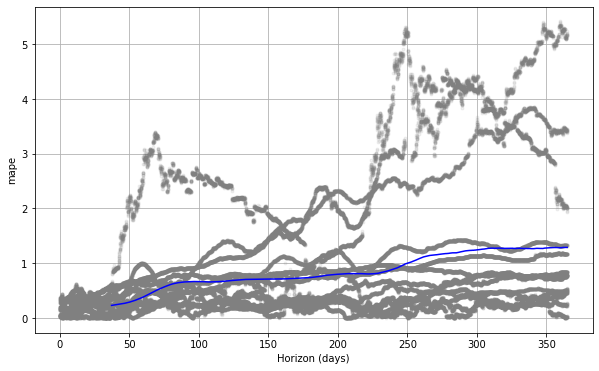

In [35]:
# here we can visualize the mape in blue, that has good value for the prediction (less than 5%)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

#### English: In summary, it was possible to analyze historical data of closing and opening values ​​of bitcoin prices with a time series (used in stocks). A prediction was also made using the Prophet da Meta model for prediction in time series. As this cryptocurrency is very volatile, a prediction of a maximum of 30,000 dollars and a minimum of 8,000 dollars of bitcoin for 2024 was obtained. With the validation metrics, it was not interesting due to the high variation in the asset.

#### Português: Em resumo foi possível analisar dados históricos de valores de fechamentos e aberturas dos preços de bitcoin com série temporal (utilizado em stocks). Também foi feita uma predição utilizado o modelo Prophet da Meta para predição em séries temporais. Como esta criptomoeda é muito volátil, foi obtida uma predição de no máximo de 30 000 dólares e uma mínima de 8,000 dólares de bitcoin para 2024. Com as métricas de validação, não foi interessante pela alta variação no ativo.